# Import and Initialize

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score
from nilmtk.legacy.disaggregate.hart_85 import Hart85

%matplotlib inline
rcParams['figure.figsize'] = (13, 6)

# Load Data

In [2]:
# test_data = DataSet('../SeniorDataset/h5_files/Hart_test_12Hour.h5')
# train_data = DataSet('../SeniorDataset/h5_files/Hart_test_12Hour.h5')

test_data = DataSet('../SeniorDataset/h5_files/96Hour.h5')
train_data = DataSet('../SeniorDataset/h5_files/96Hour.h5')

train_data.set_window(start='2022-01-01', end='2022-01-02') #train on a 4-hour window
train_elec = train_data.buildings[1].elec
train_mains = train_elec.mains()
train_submeters = train_elec.submeters()

test_data.set_window(start='2022-01-02', end='2022-01-03')
test_elec = test_data.buildings[1].elec
test_mains = test_elec.mains()
test_submeters = test_elec.submeters()

h = Hart85()

# Train Hart85 Model

In [3]:
h.train(train_mains, columns=[('power', 'apparent')], buffer_size=100)

/building1/elec/meter1 (Group) ''
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


# Disaggregate

In [5]:
output = HDFDataStore('output.h5', 'w')
df = h.disaggregate(test_mains, output, sample_period=1)
output.close()

/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
/building1/elec/meter1 (Group) ''
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
/building1/elec/meter1 (Group) ''
Next Chunk..
Appending mains data to datastore
/building1/elec/meter1 (Group) ''
Done


# Visualize the Data

In [30]:
#Hart is unsupervised
h.best_matched_appliance(test_submeters, df)

/building1/elec/meter2 (Group) ''
/building1/elec/meter3 (Group) ''
/building1/elec/meter4 (Group) ''
/building1/elec/meter5 (Group) ''
/building1/elec/meter6 (Group) ''
/building1/elec/meter7 (Group) ''
Best Matched Pair is (0, (2, 1, 'Senior Design Dataset'))
Best Matched Pair is (1, (2, 1, 'Senior Design Dataset'))
Best Matched Pair is (2, (7, 1, 'Senior Design Dataset'))
Best Matched Pair is (3, (7, 1, 'Senior Design Dataset'))
Best Matched Pair is (4, (2, 1, 'Senior Design Dataset'))
Best Matched Pair is (5, (7, 1, 'Senior Design Dataset'))
Best Matched Pair is (6, (7, 1, 'Senior Design Dataset'))


In [16]:
print(test_elec)
instance_dict = {2: 'fridge', 3: 'kettle', 4: 'microwave', 5: 'toaster', 6: 'hair dryer', 7: 'slow cooker'}

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='Senior Design Dataset', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=4, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=5, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=6, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='hair dryer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='slow cooker', instance=1)])
)


/building1/elec/meter2 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

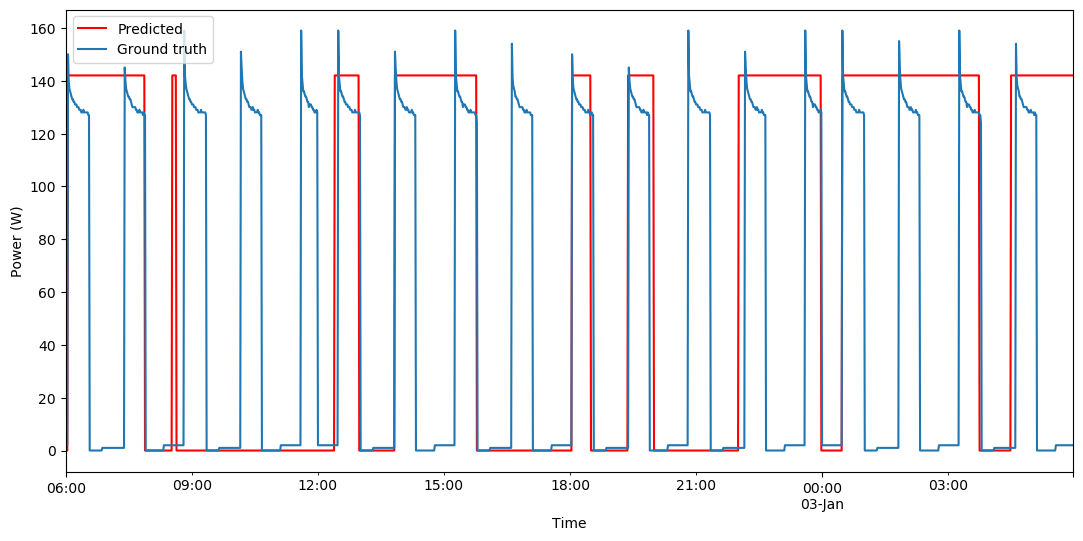

In [17]:
instance = 2

df_index = 0
df_pred = next(test_elec[instance_dict[instance], 1].load())
merged_df = pd.merge(df[df_index], df_pred, left_index=True, right_index=True)
merged_df[df_index].plot(c='r')
merged_df['power', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter2 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

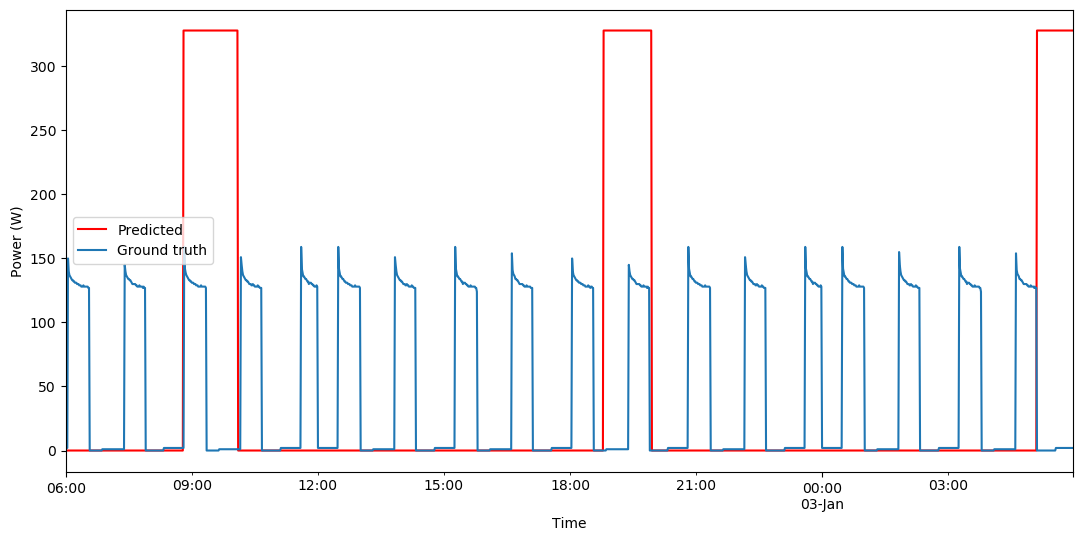

In [18]:
instance = 2

df_index = 1
df_pred = next(test_elec[instance_dict[instance], 1].load())
merged_df = pd.merge(df[df_index], df_pred, left_index=True, right_index=True)
merged_df[df_index].plot(c='r')
merged_df['power', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter7 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

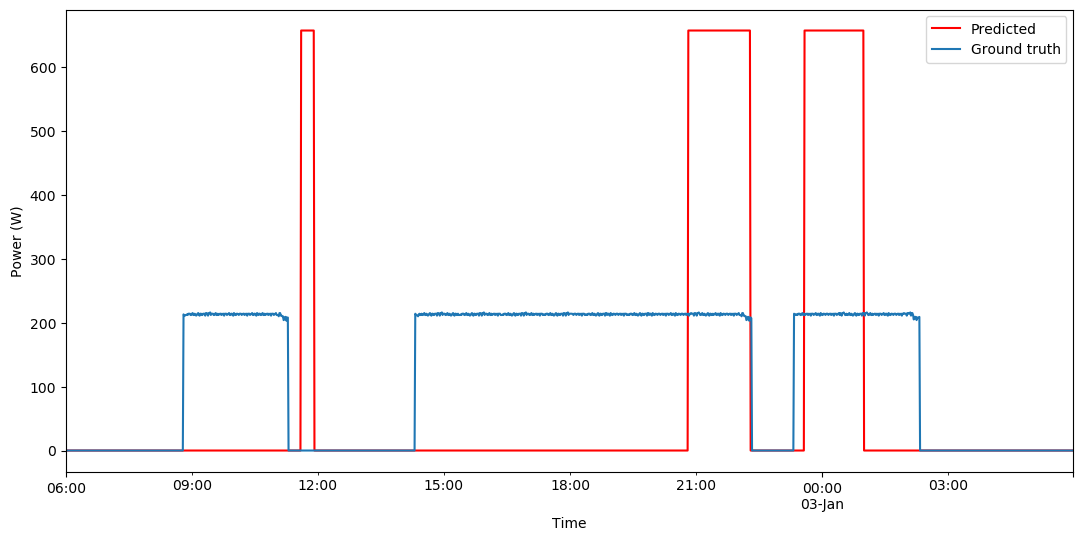

In [19]:
instance = 7

df_index = 2
df_pred = next(test_elec[instance_dict[instance], 1].load())
merged_df = pd.merge(df[df_index], df_pred, left_index=True, right_index=True)
merged_df[df_index].plot(c='r')
merged_df['power', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter7 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

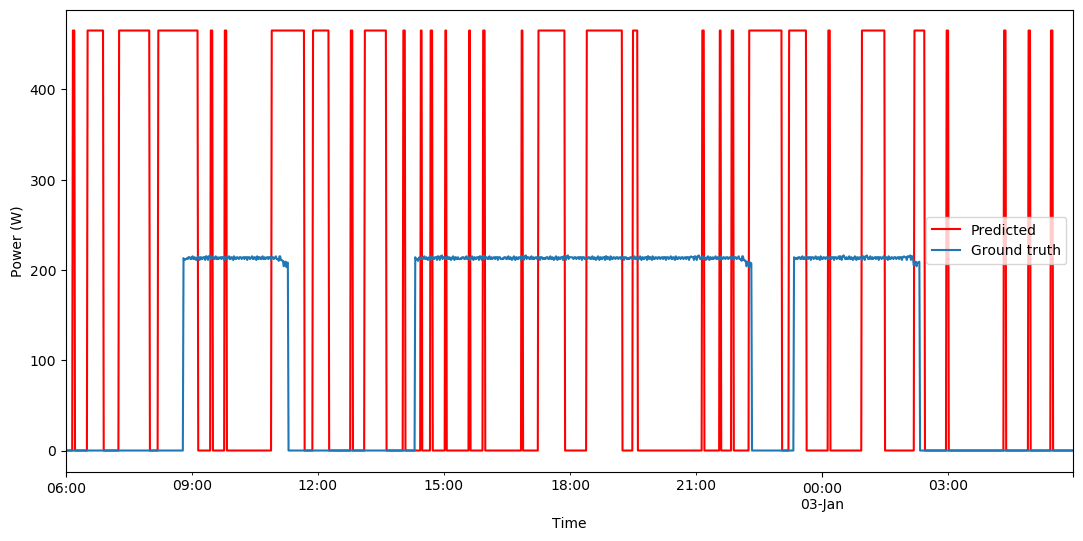

In [20]:
instance = 7

df_index = 3
df_pred = next(test_elec[instance_dict[instance], 1].load())
merged_df = pd.merge(df[df_index], df_pred, left_index=True, right_index=True)
merged_df[df_index].plot(c='r')
merged_df['power', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

/building1/elec/meter7 (Group) ''


/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/brandongorter/opt/anaconda3/envs/nilmtk2/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5, 0, 'Time')

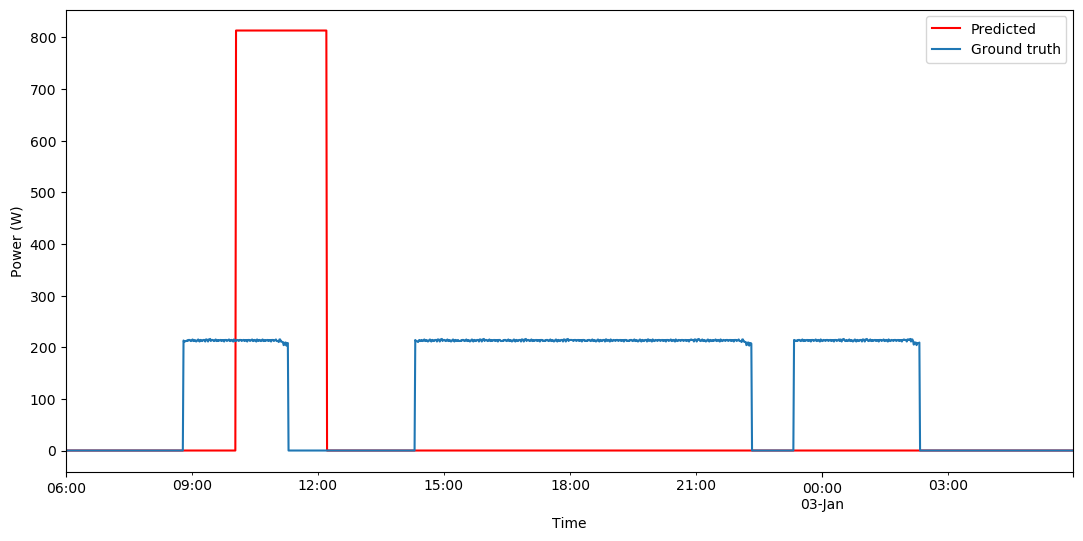

In [26]:
instance = 7

df_index = 4
df_pred = next(test_elec[instance_dict[instance], 1].load())
merged_df = pd.merge(df[df_index], df_pred, left_index=True, right_index=True)
merged_df[df_index].plot(c='r')
merged_df['power', 'apparent'].plot()
plt.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time")

# Statistical Performance Metrics

In [6]:
prediction_data = DataSet('output.h5')

predictions_metergroup = prediction_data.buildings[1].elec
ground_truth_metergroup = test_elec

print(predictions_metergroup)
print(ground_truth_metergroup)

f1 = f1_score(predictions_metergroup, ground_truth_metergroup)

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='Hart85', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=3, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=2)])
  ElecMeter(instance=4, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=3)])
  ElecMeter(instance=5, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=4)])
  ElecMeter(instance=6, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=5)])
  ElecMeter(instance=7, building=1, dataset='Hart85', appliances=[Appliance(type='unknown', instance=6)])
)
MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='Senior Design Dataset', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='Senior Design Dataset', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, bui

In [7]:
print(f1)

2    0.580975
3    0.071389
4    0.076520
5    0.030082
6    0.196105
7    0.286981
dtype: float64
